In [8]:
from mcl import *
from kf import *
from ukf import *
import time

trial times = 100


/home/ubuntu-20/gnss_fusion_learning/ideal_robot.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4,4))


MCL (100) Average = 4.414, Maximum = 6.485, Minimum = 3.984
MCL (1000) Average = 35.223, Maximum = 43.219, Minimum = 34.136
EKF Average = 0.631, Maximum = 0.805, Minimum = 0.588
UKF Average = 0.730, Maximum = 0.992, Minimum = 0.675


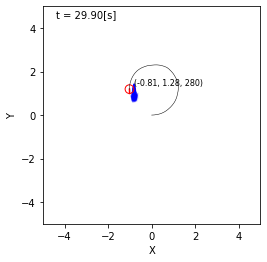

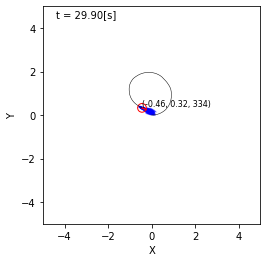

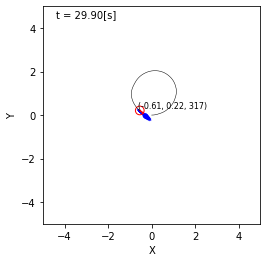

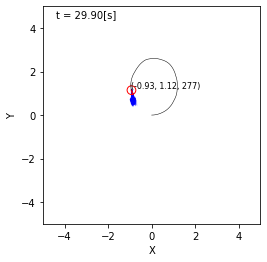

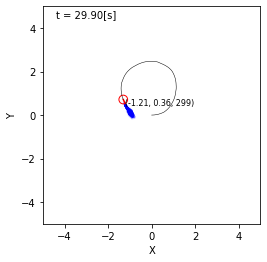

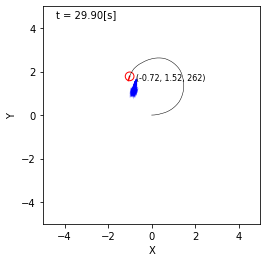

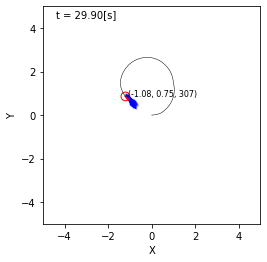

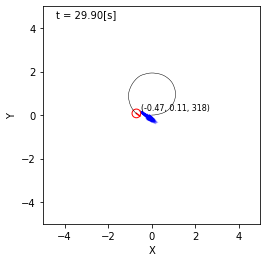

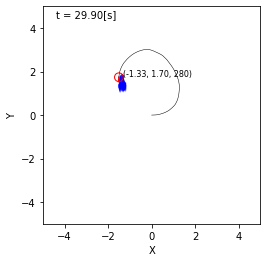

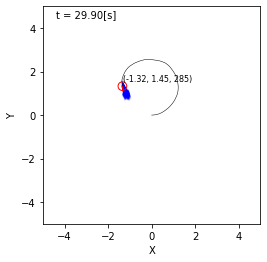

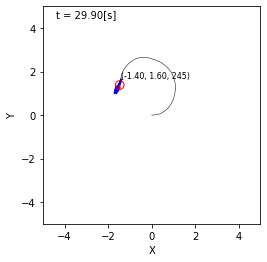

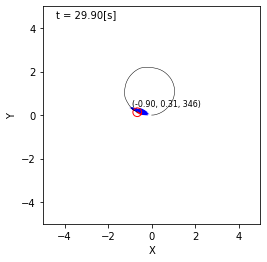

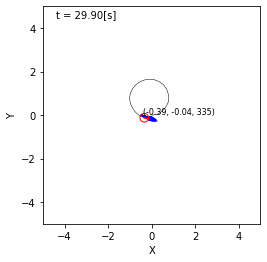

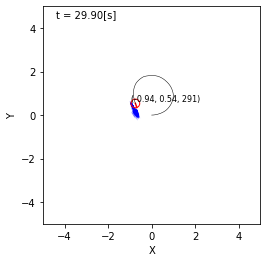

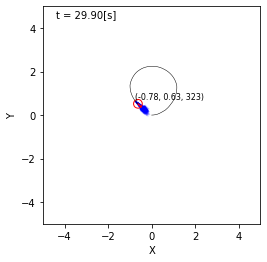

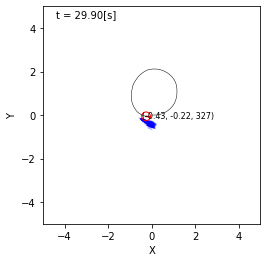

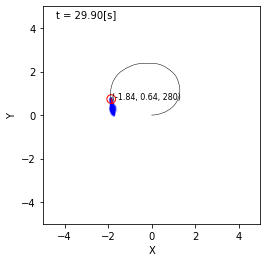

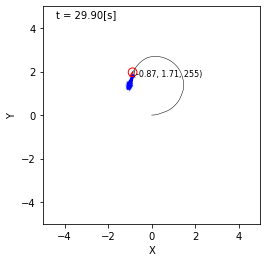

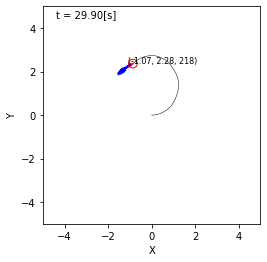

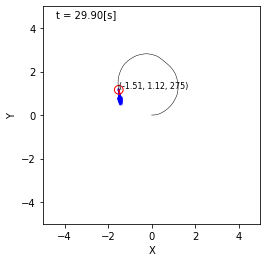

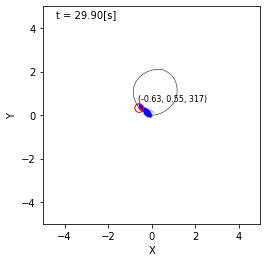

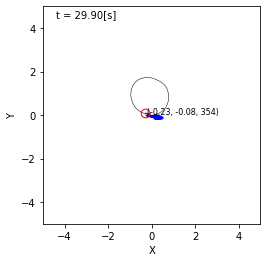

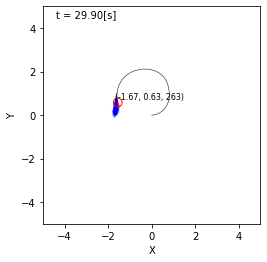

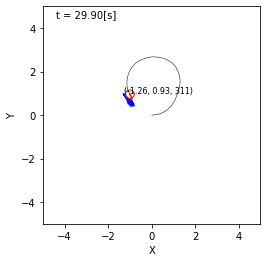

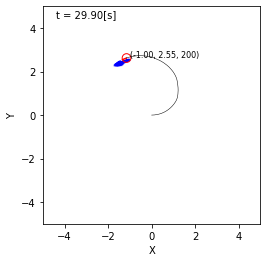

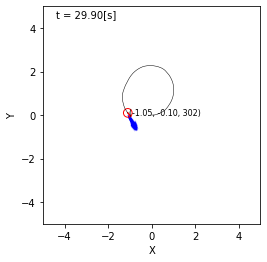

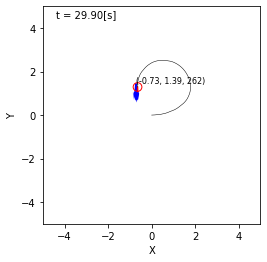

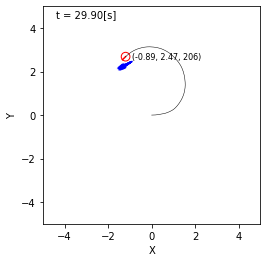

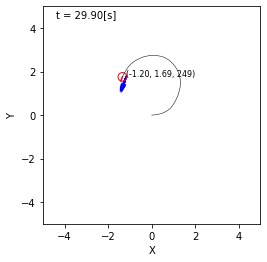

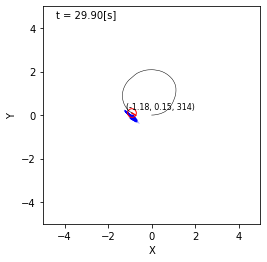

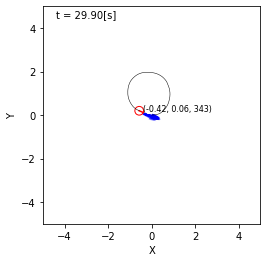

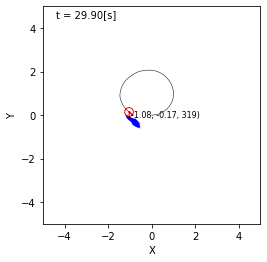

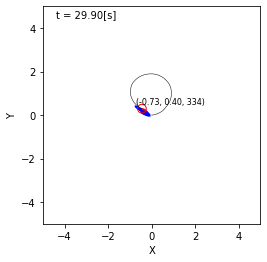

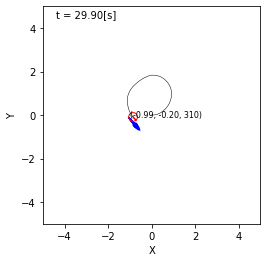

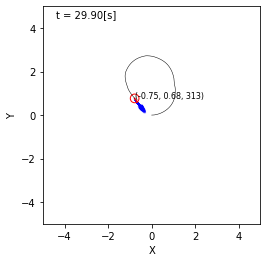

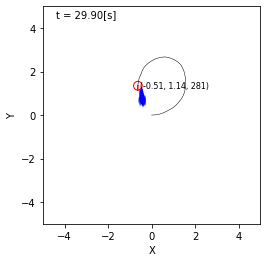

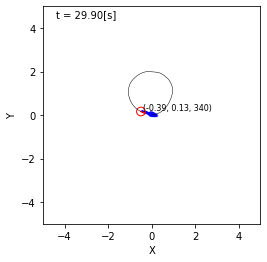

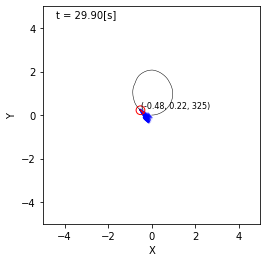

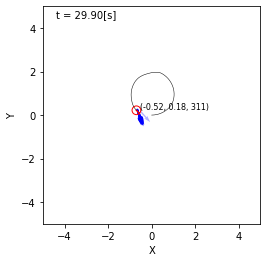

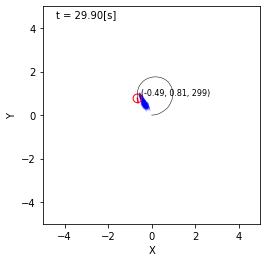

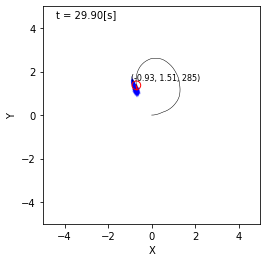

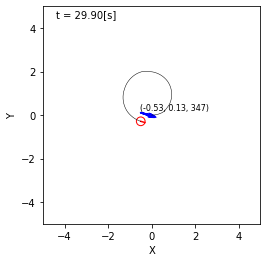

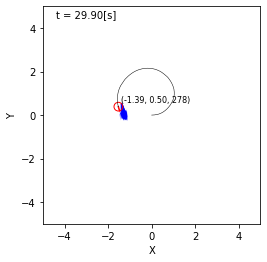

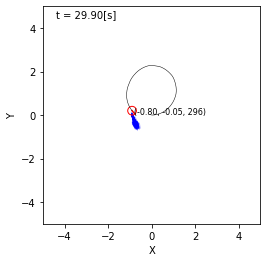

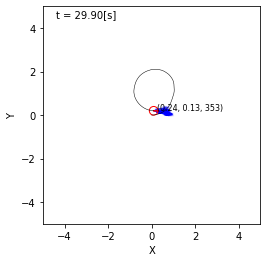

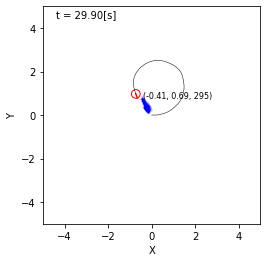

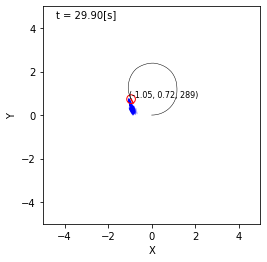

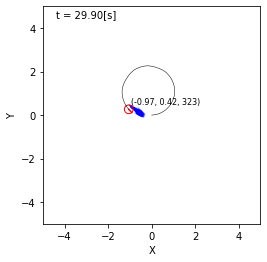

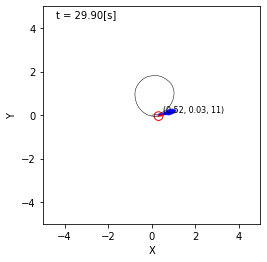

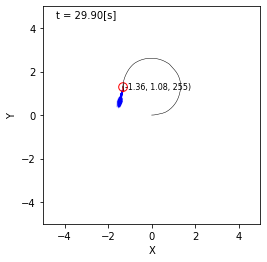

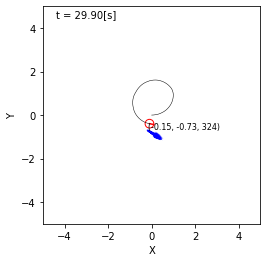

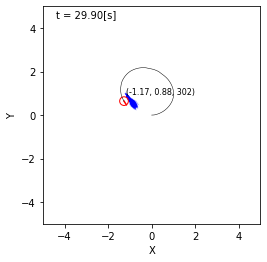

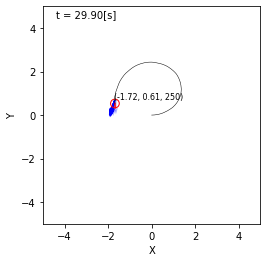

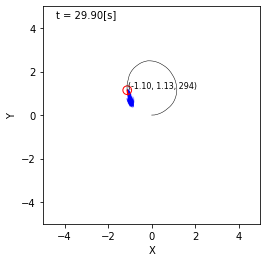

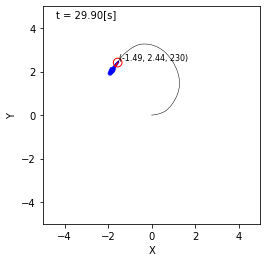

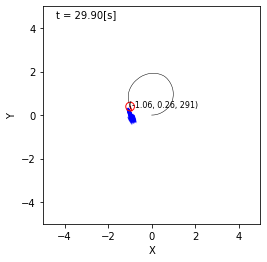

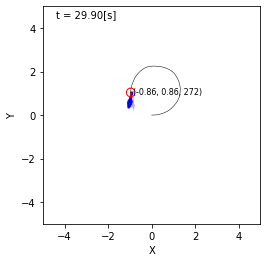

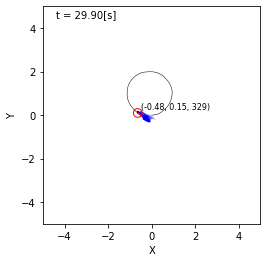

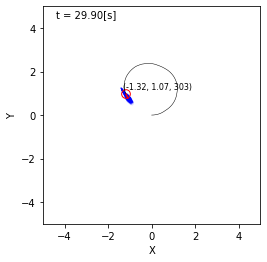

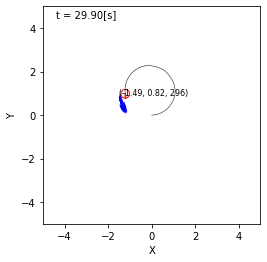

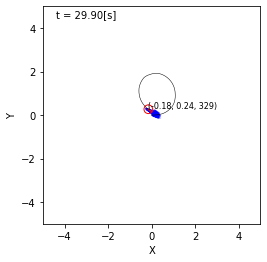

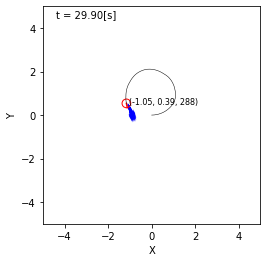

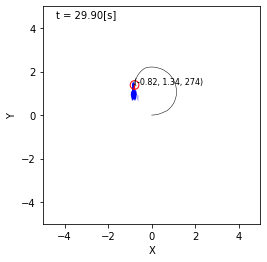

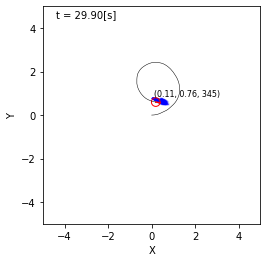

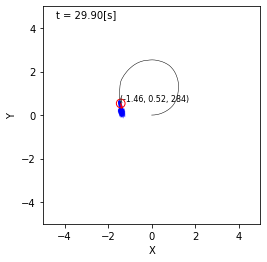

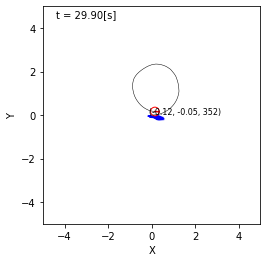

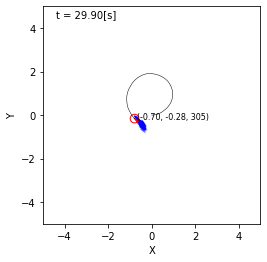

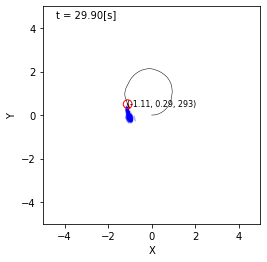

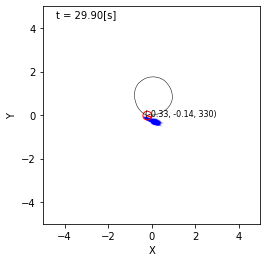

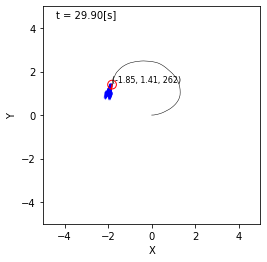

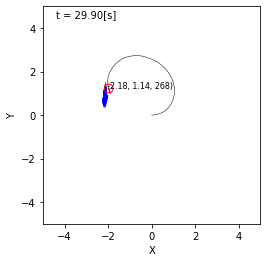

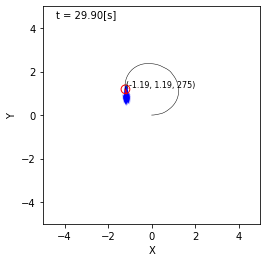

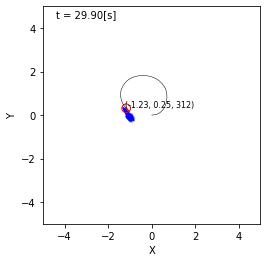

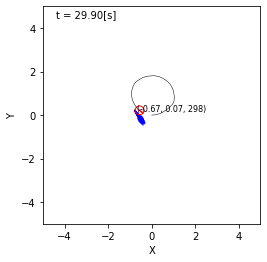

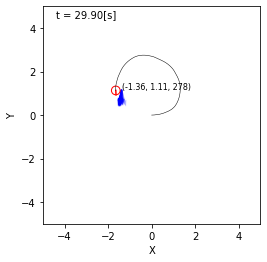

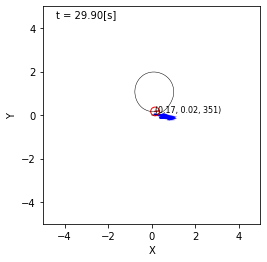

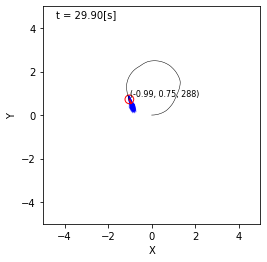

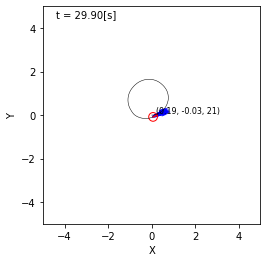

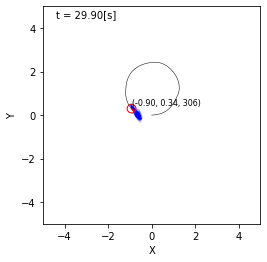

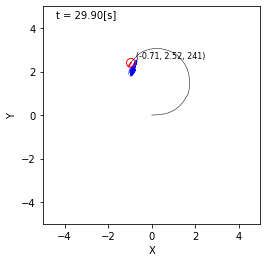

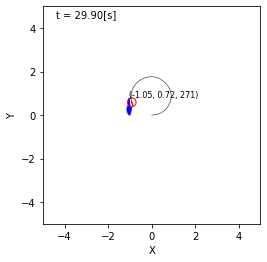

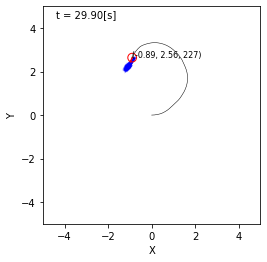

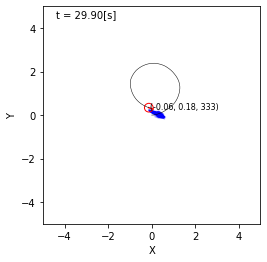

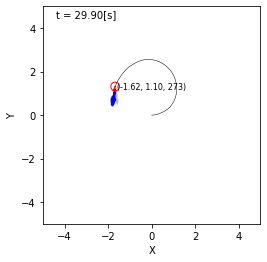

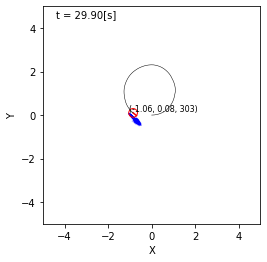

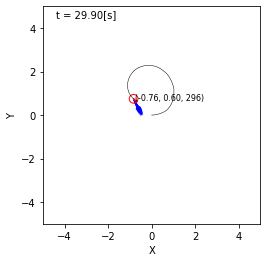

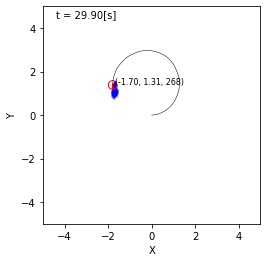

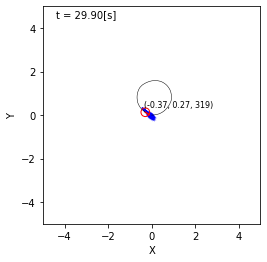

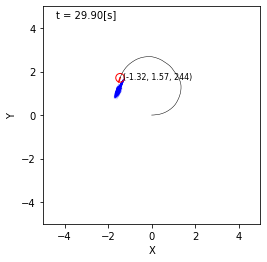

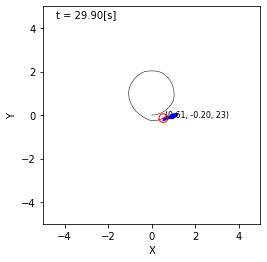

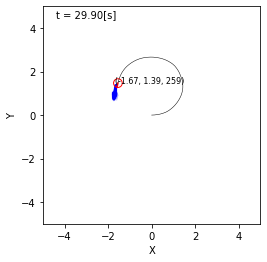

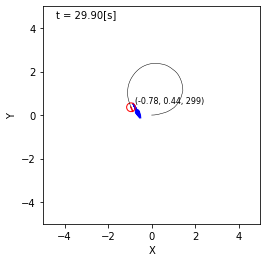

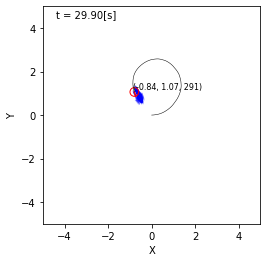

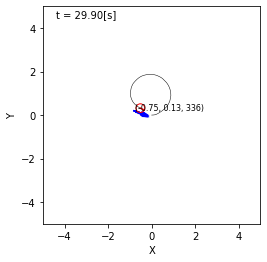

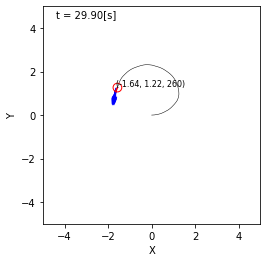

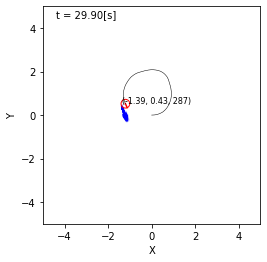

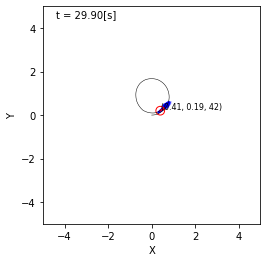

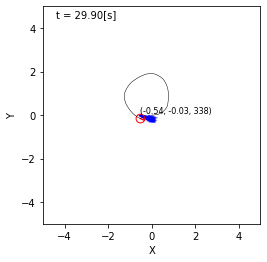

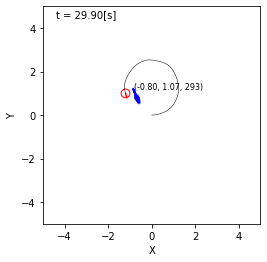

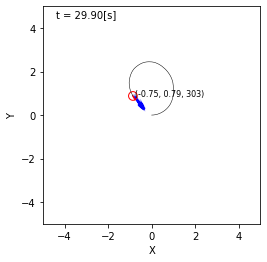

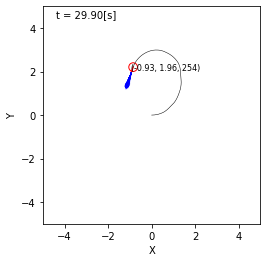

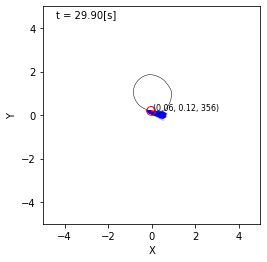

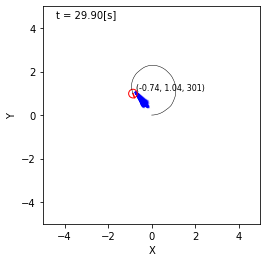

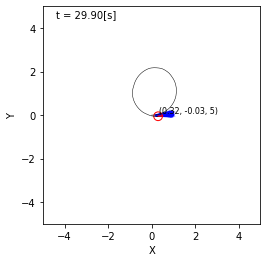

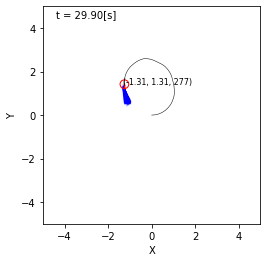

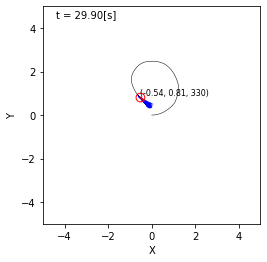

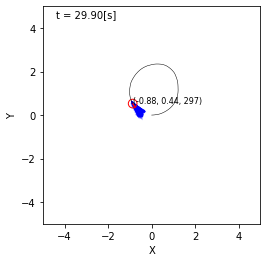

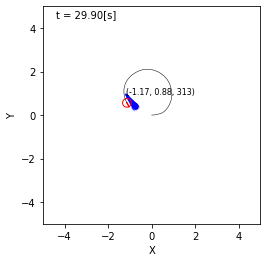

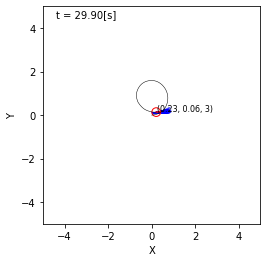

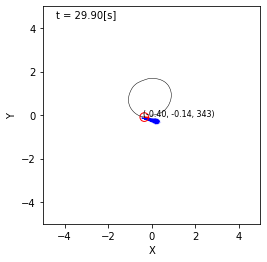

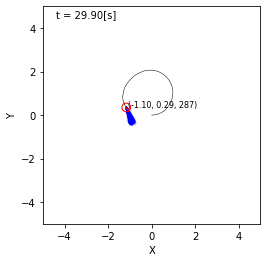

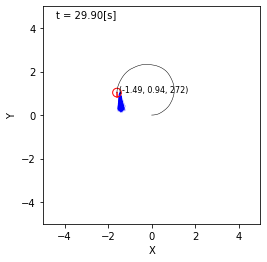

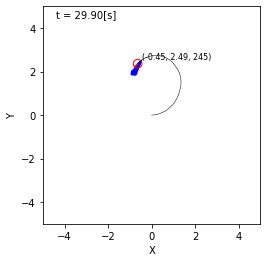

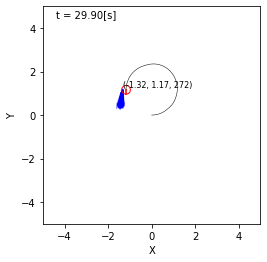

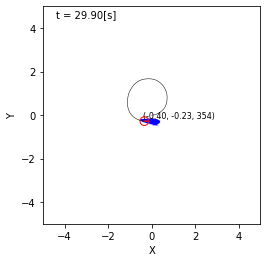

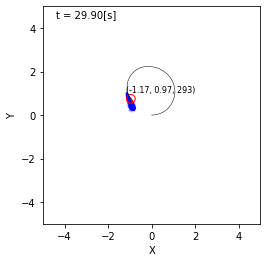

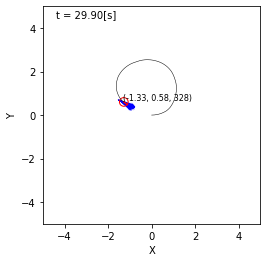

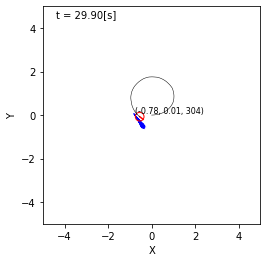

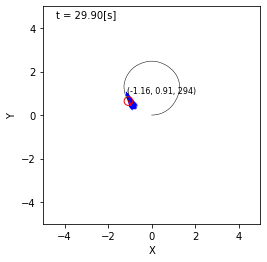

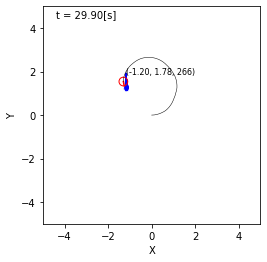

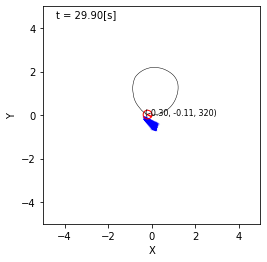

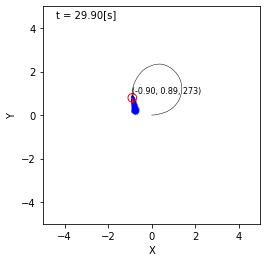

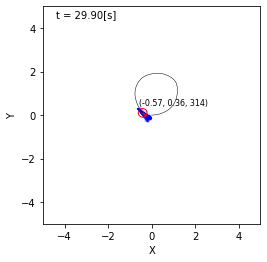

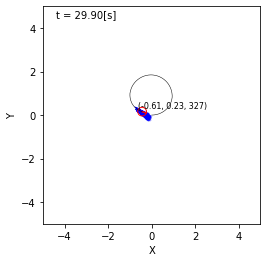

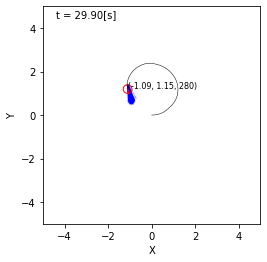

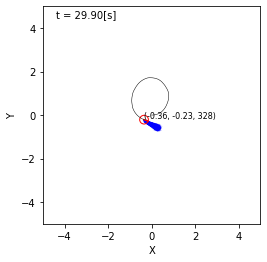

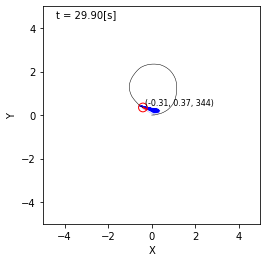

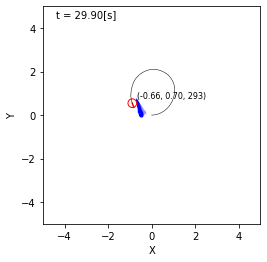

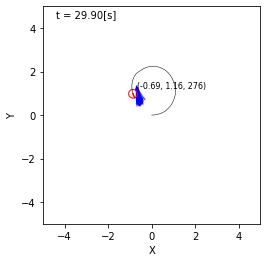

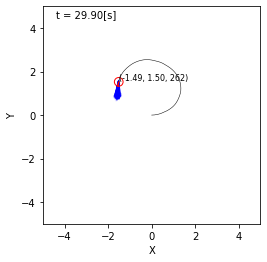

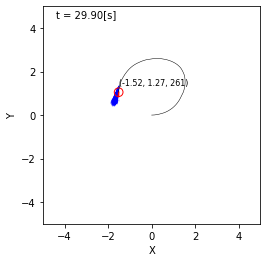

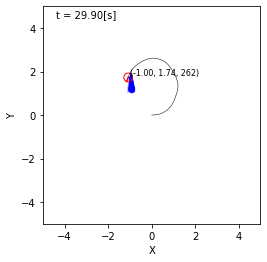

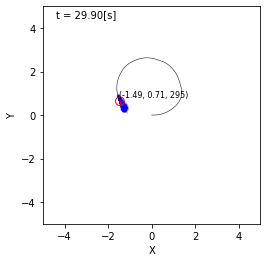

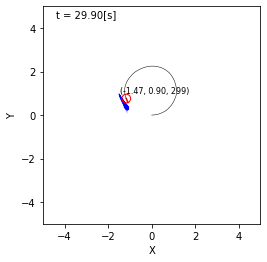

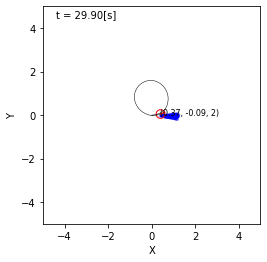

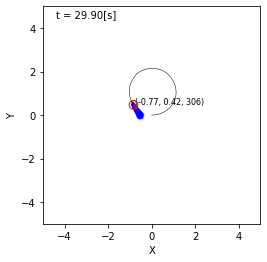

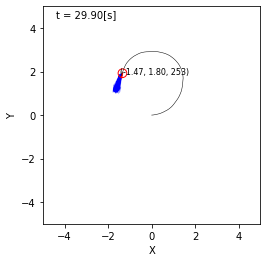

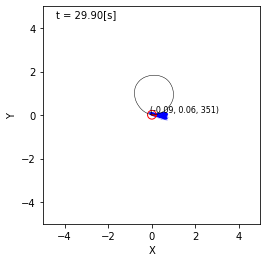

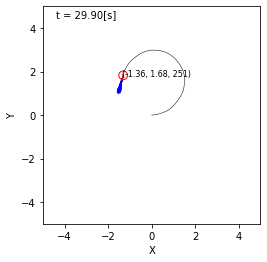

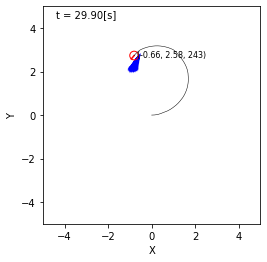

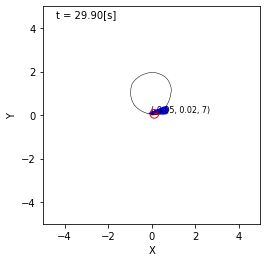

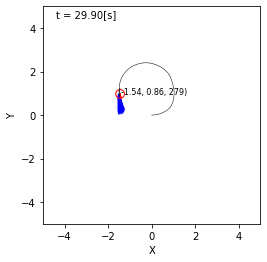

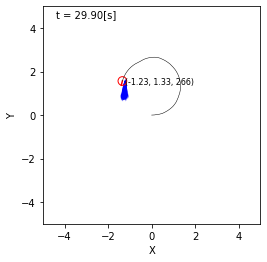

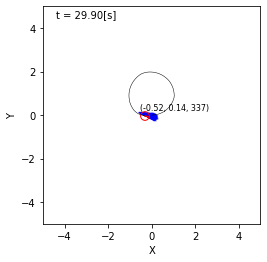

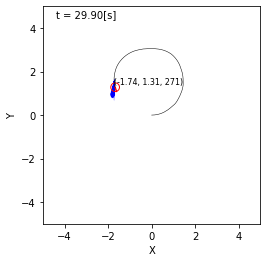

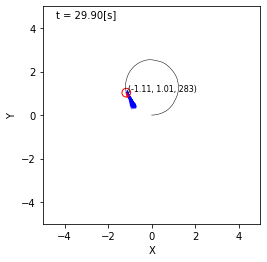

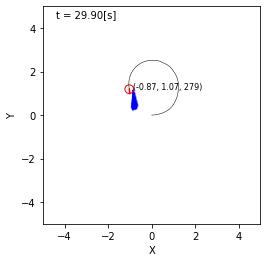

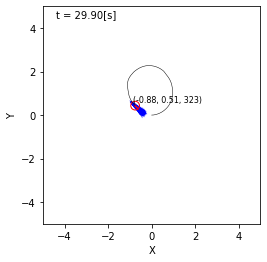

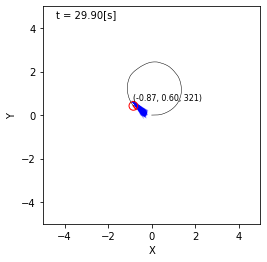

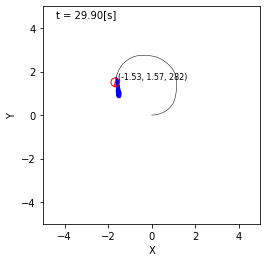

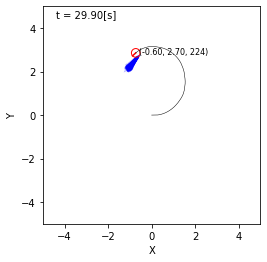

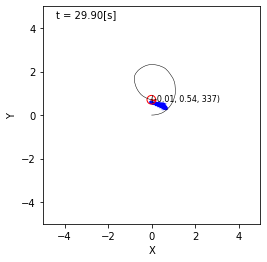

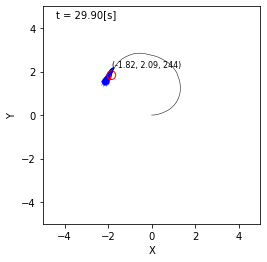

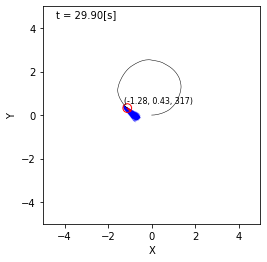

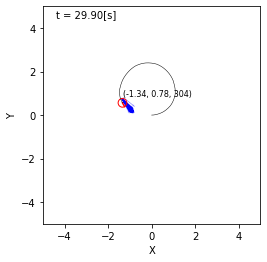

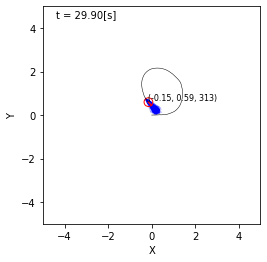

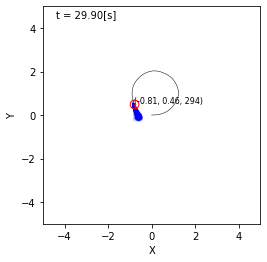

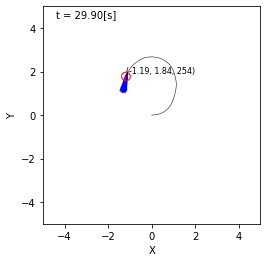

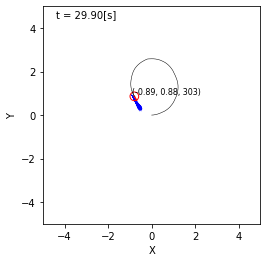

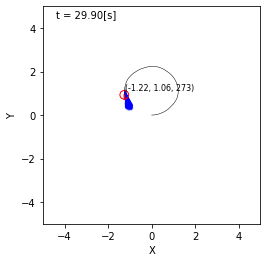

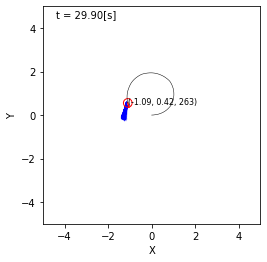

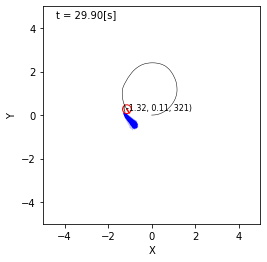

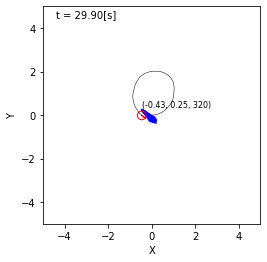

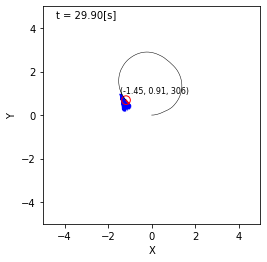

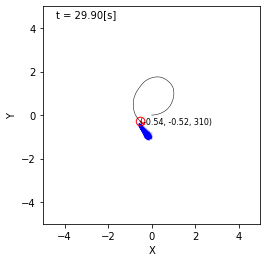

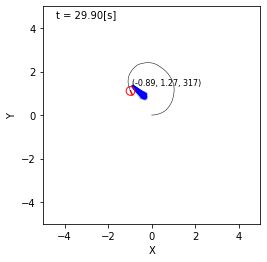

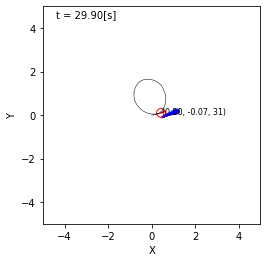

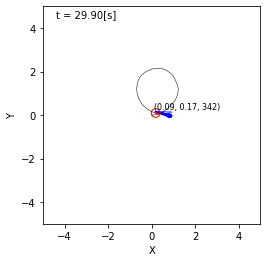

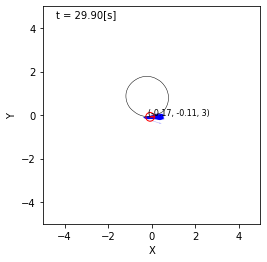

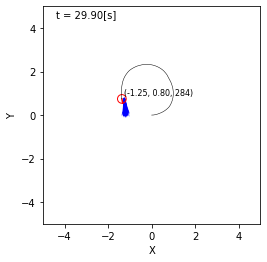

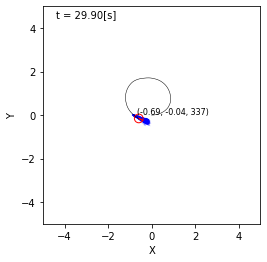

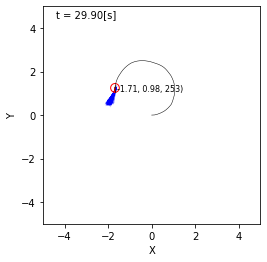

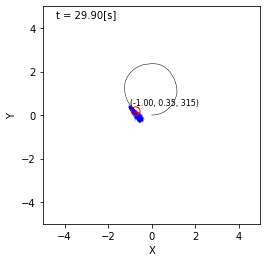

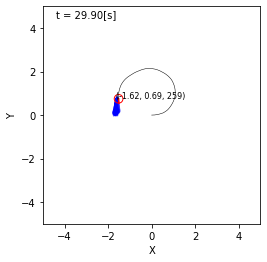

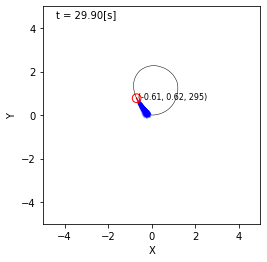

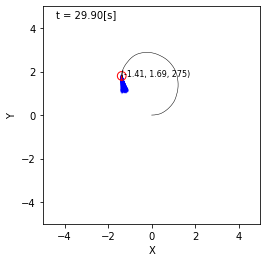

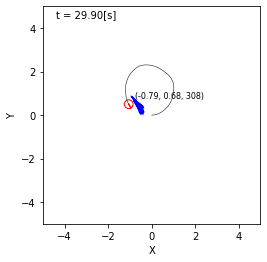

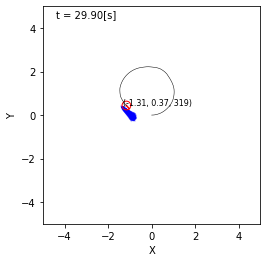

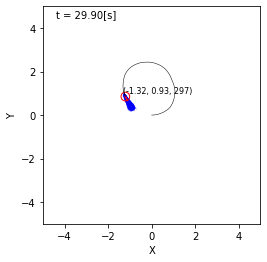

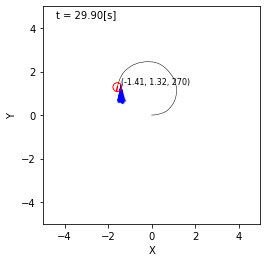

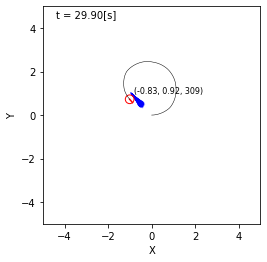

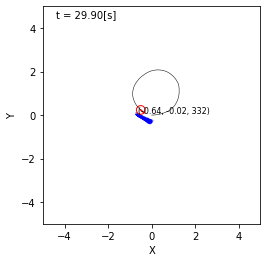

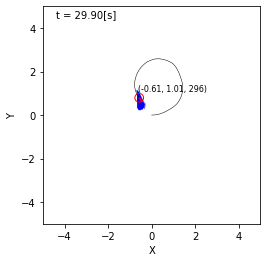

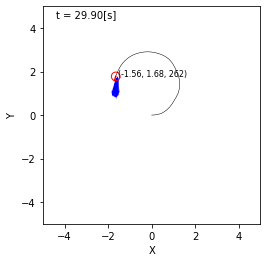

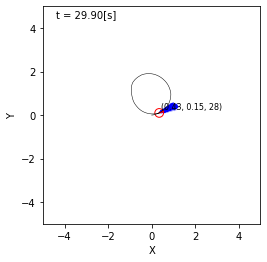

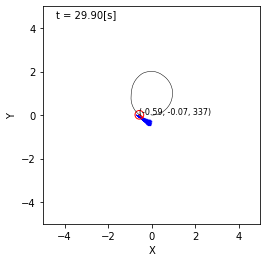

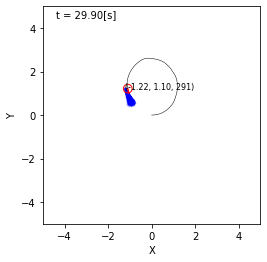

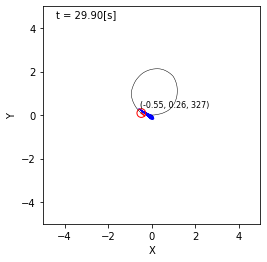

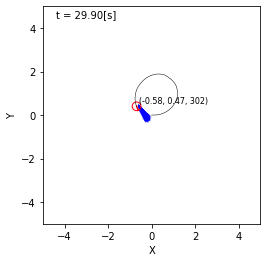

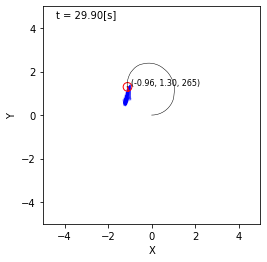

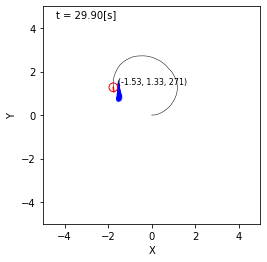

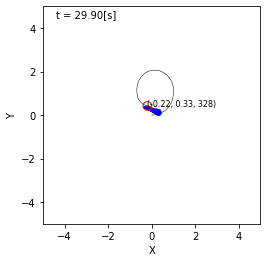

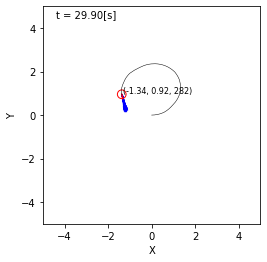

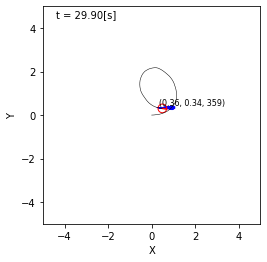

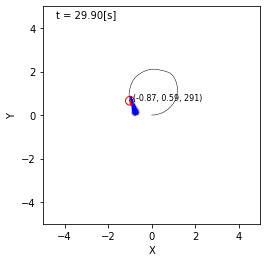

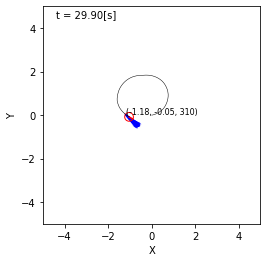

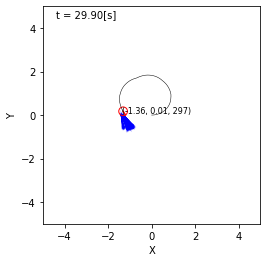

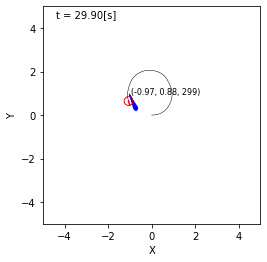

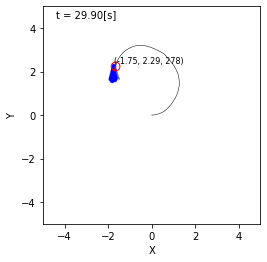

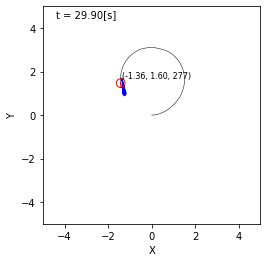

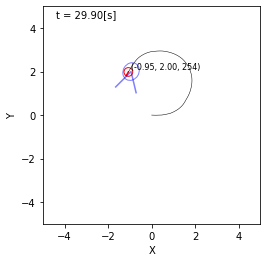

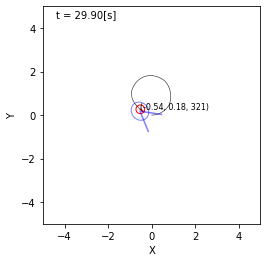

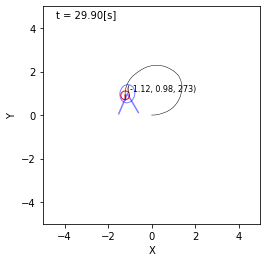

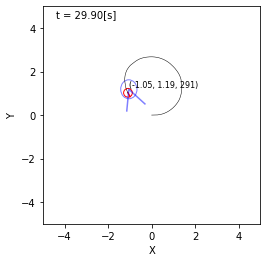

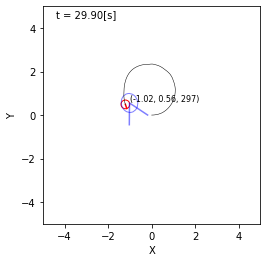

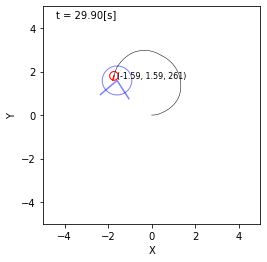

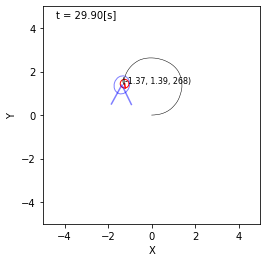

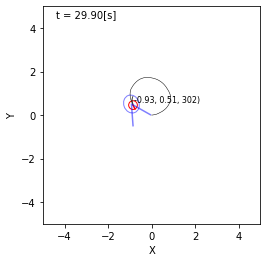

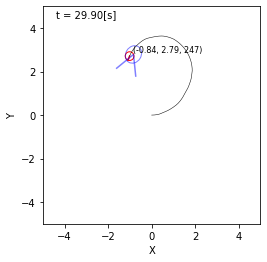

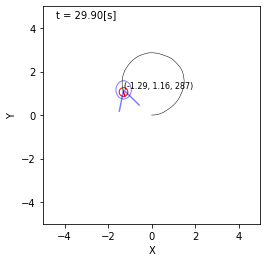

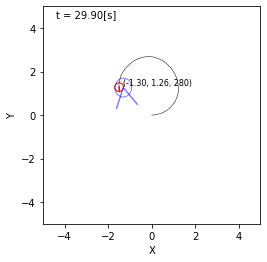

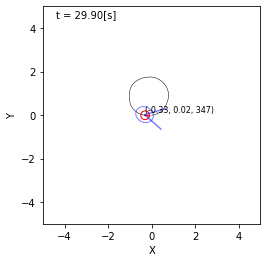

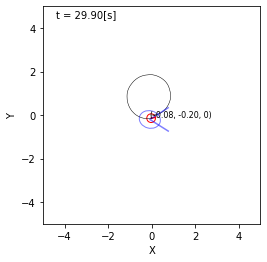

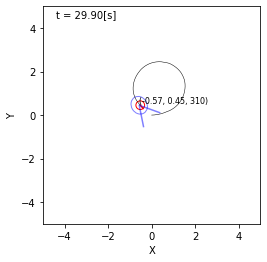

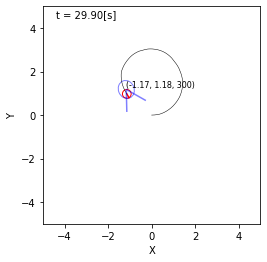

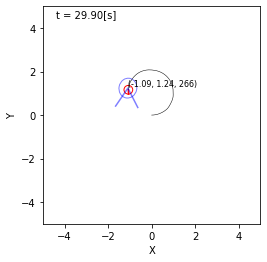

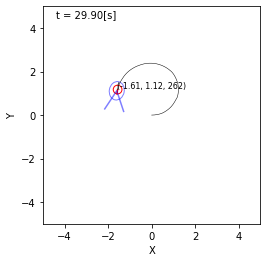

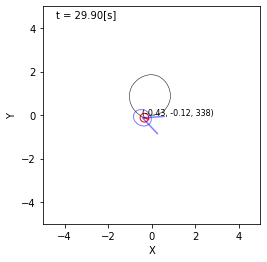

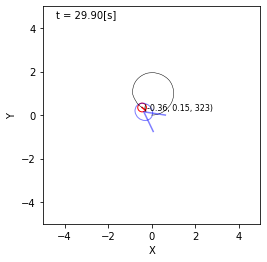

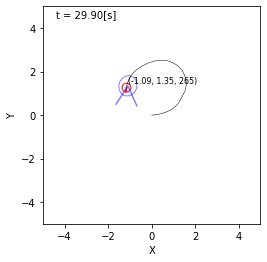

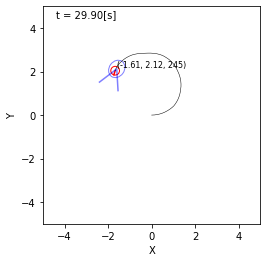

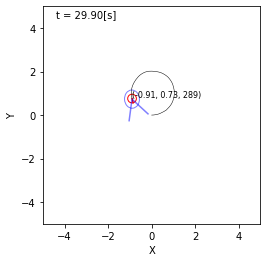

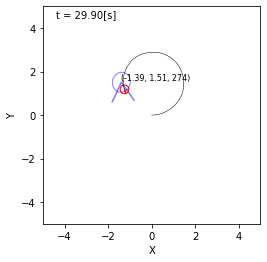

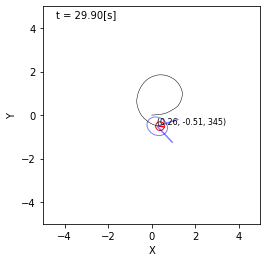

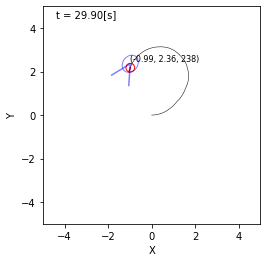

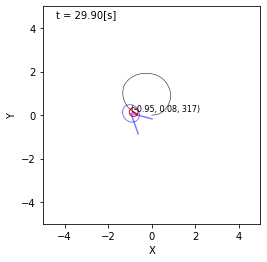

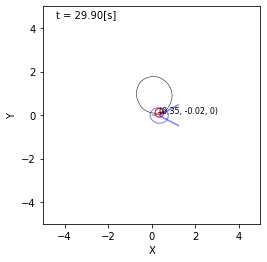

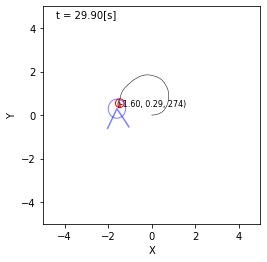

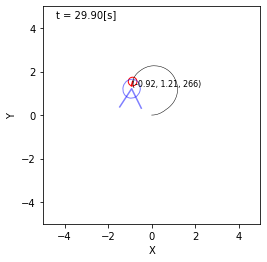

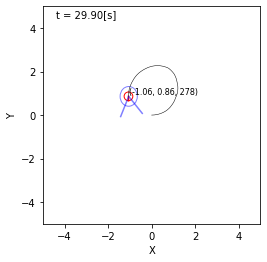

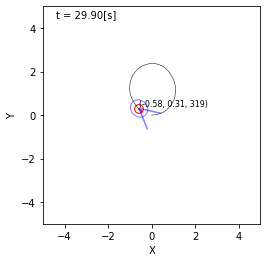

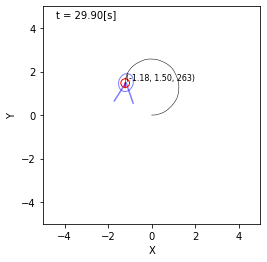

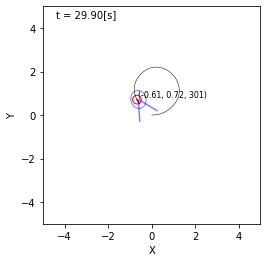

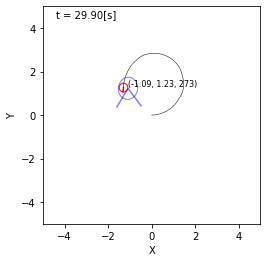

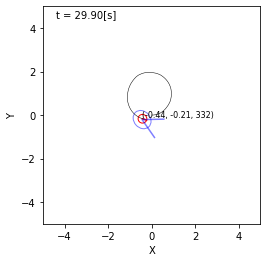

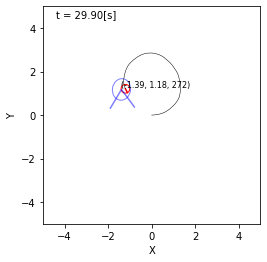

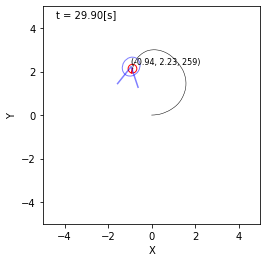

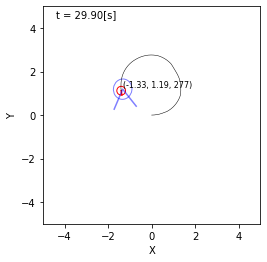

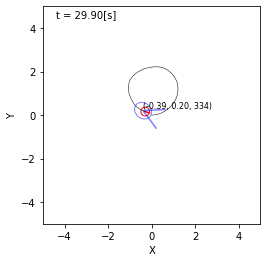

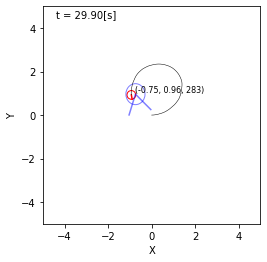

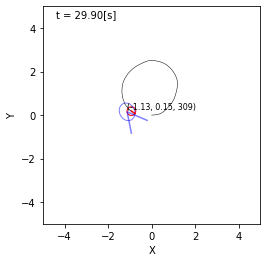

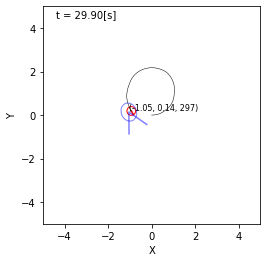

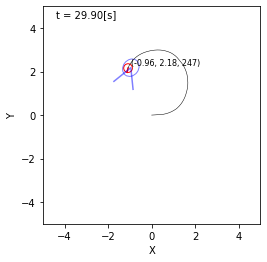

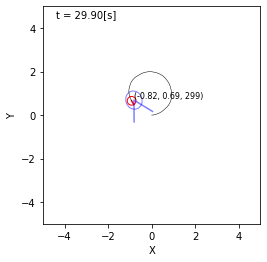

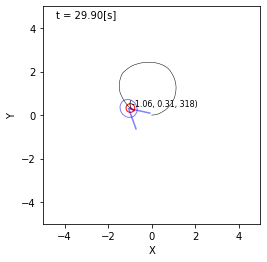

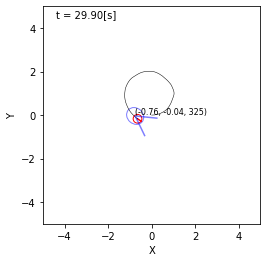

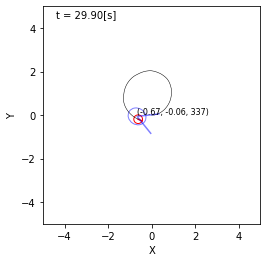

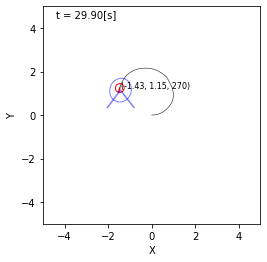

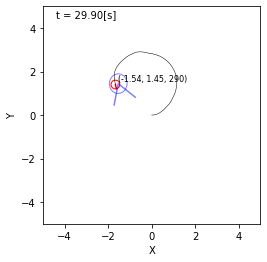

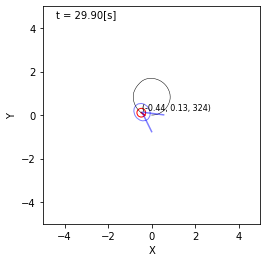

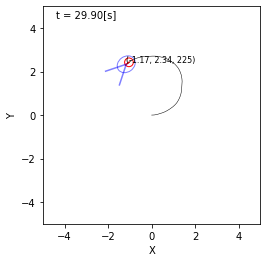

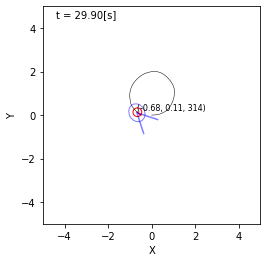

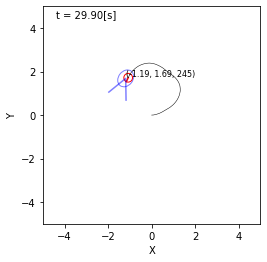

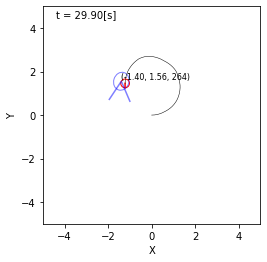

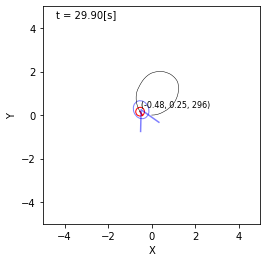

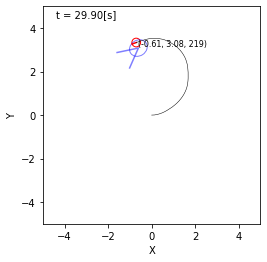

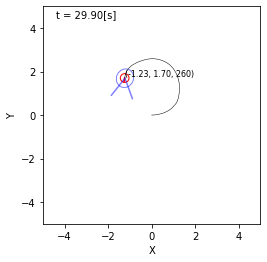

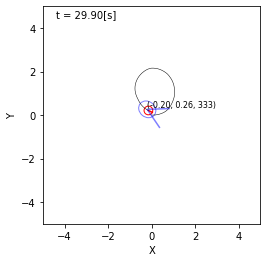

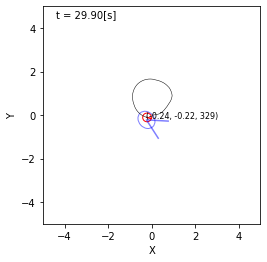

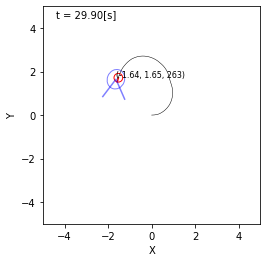

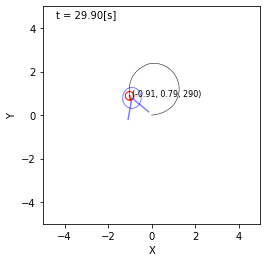

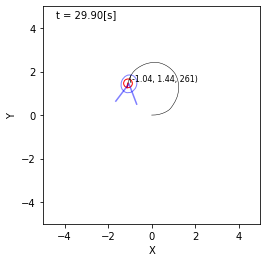

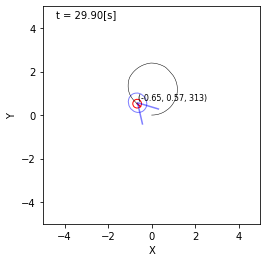

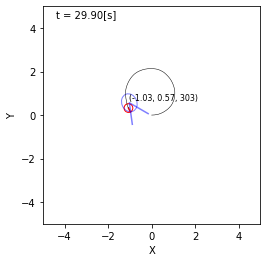

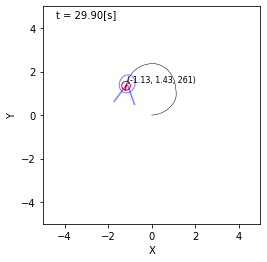

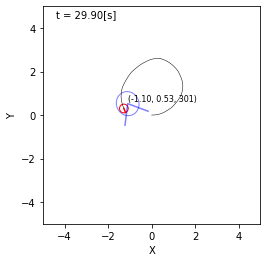

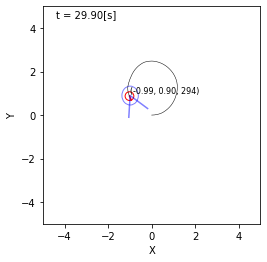

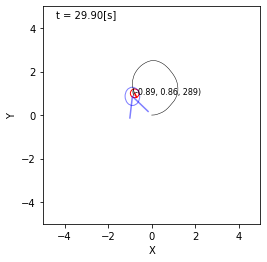

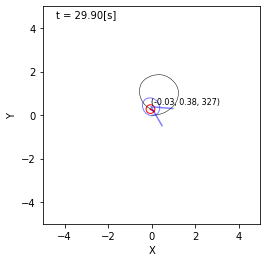

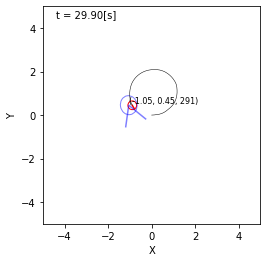

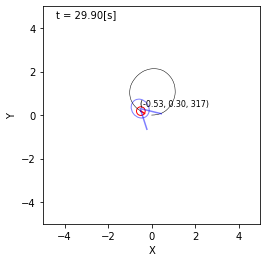

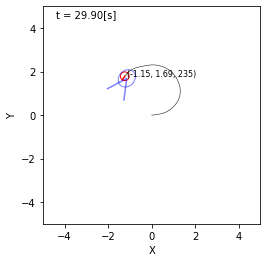

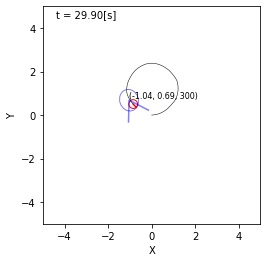

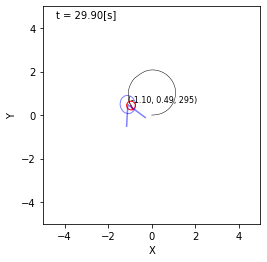

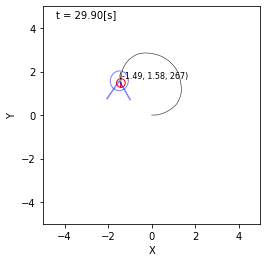

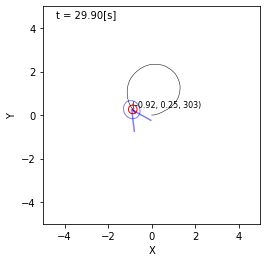

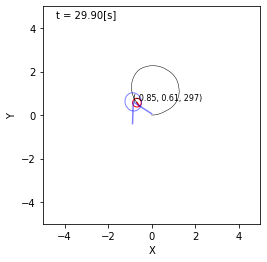

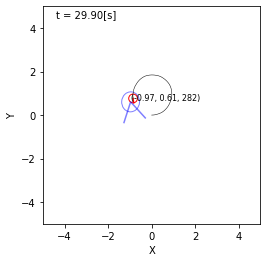

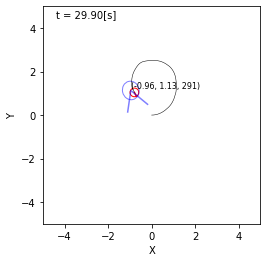

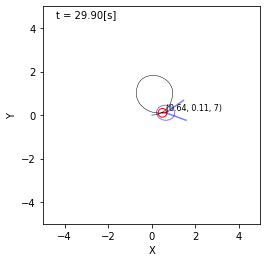

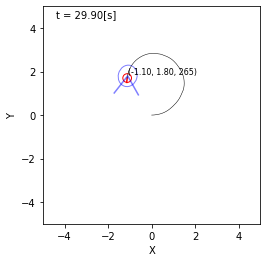

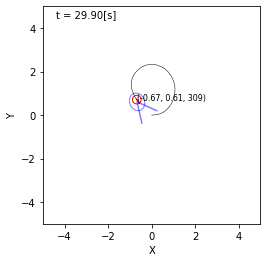

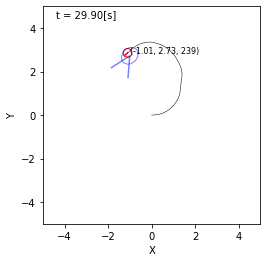

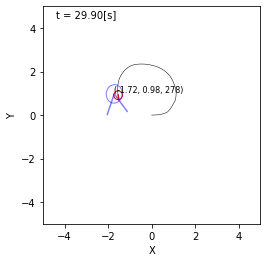

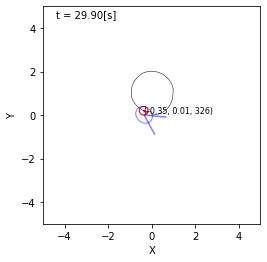

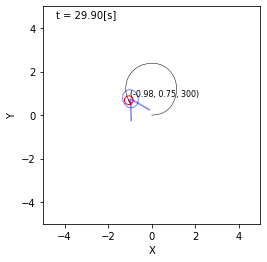

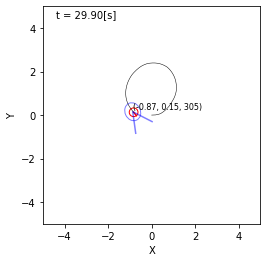

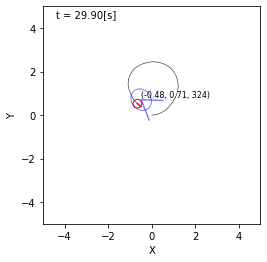

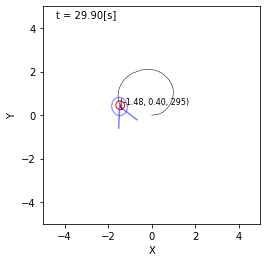

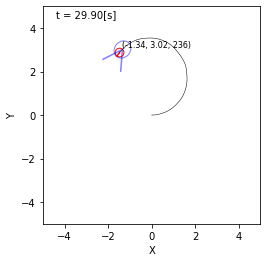

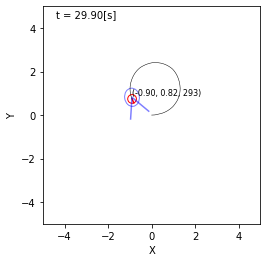

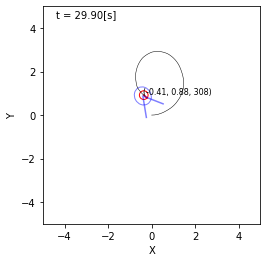

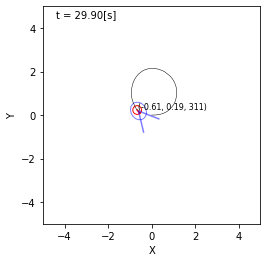

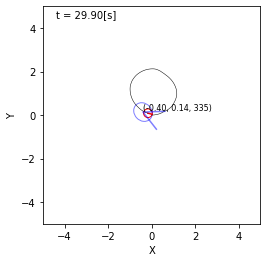

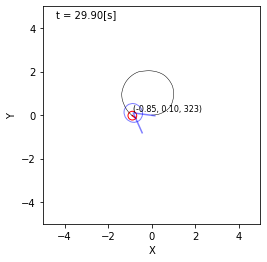

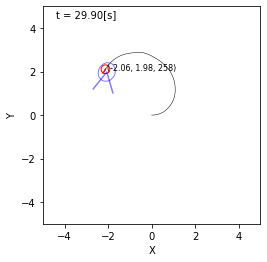

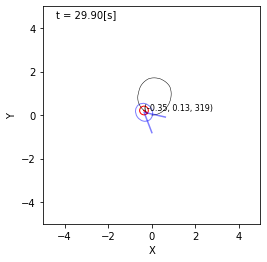

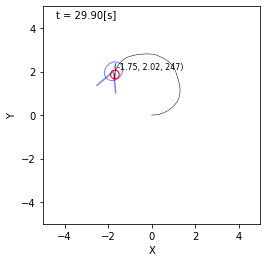

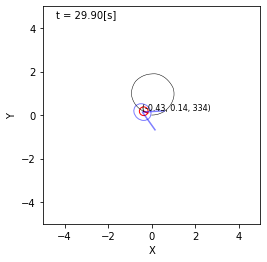

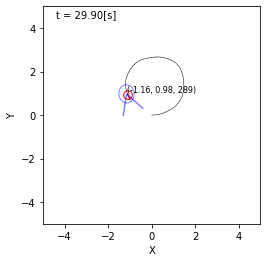

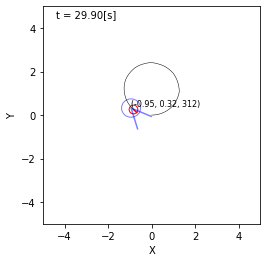

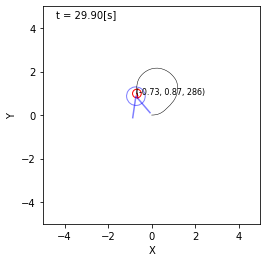

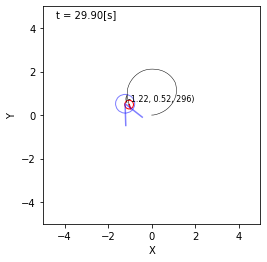

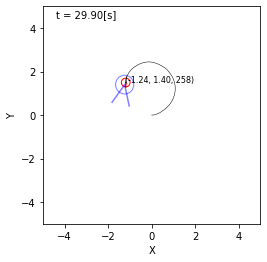

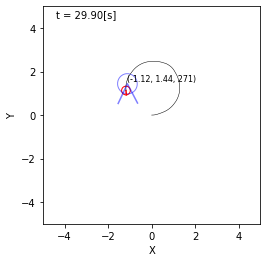

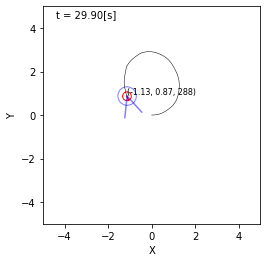

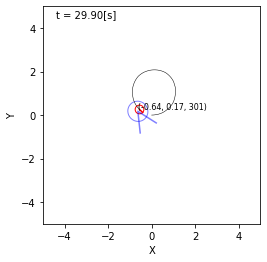

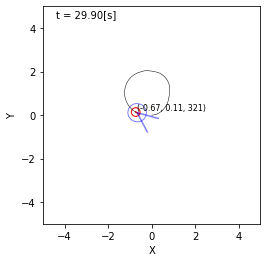

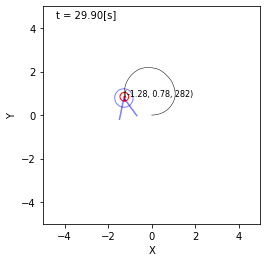

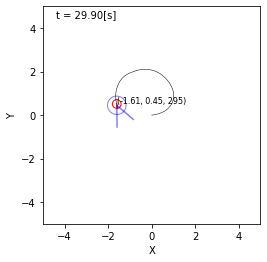

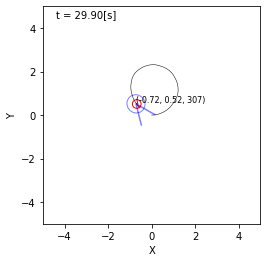

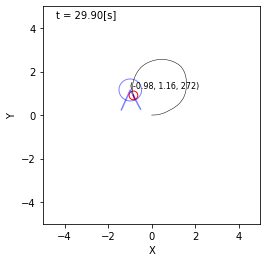

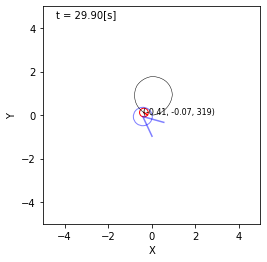

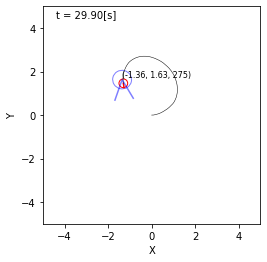

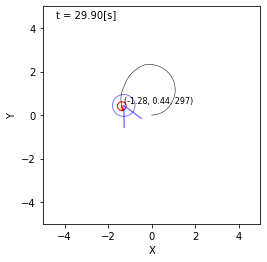

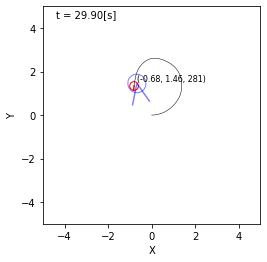

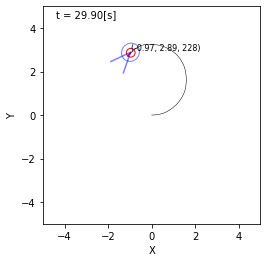

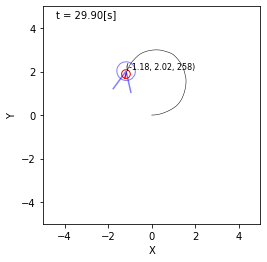

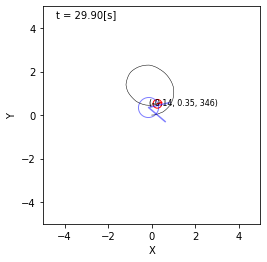

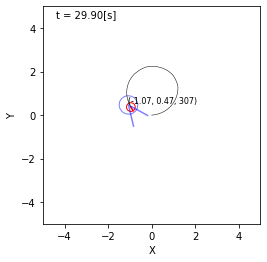

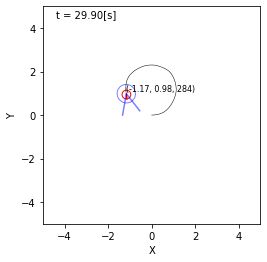

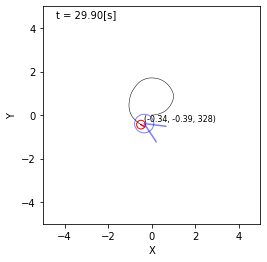

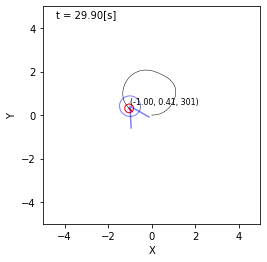

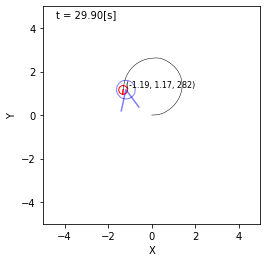

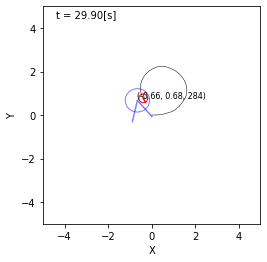

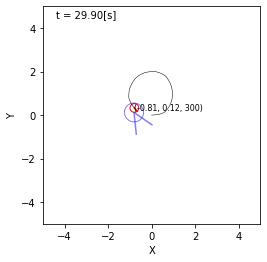

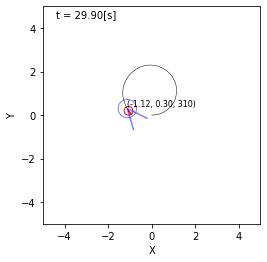

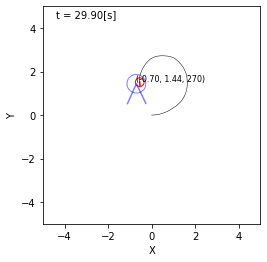

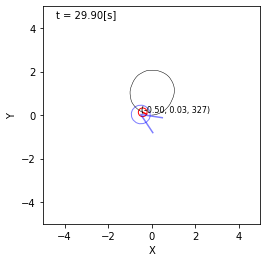

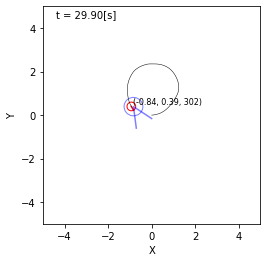

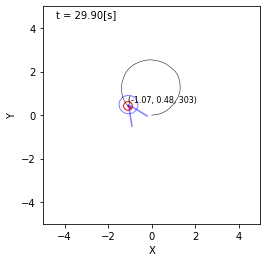

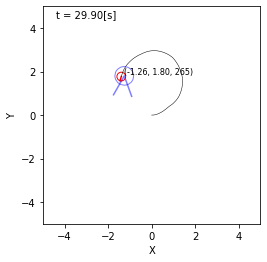

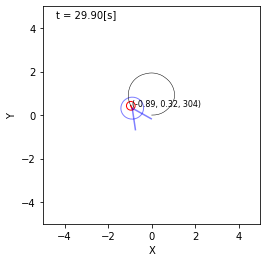

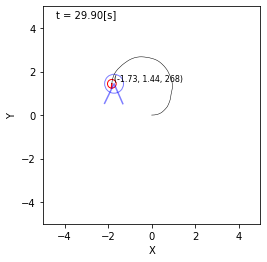

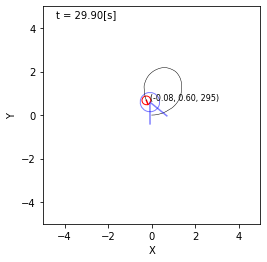

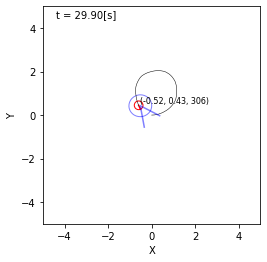

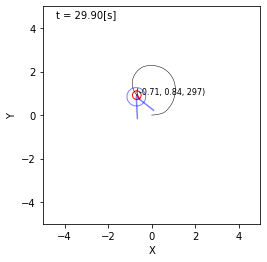

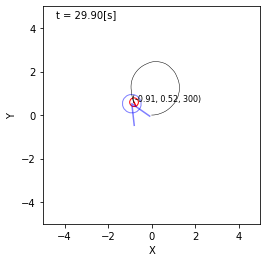

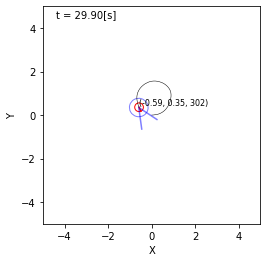

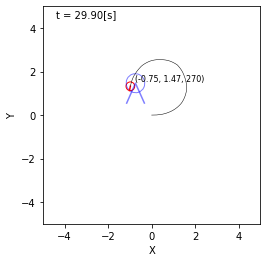

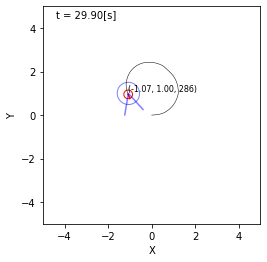

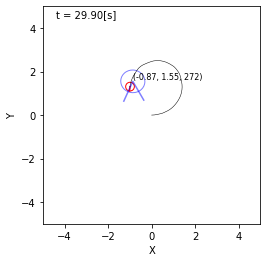

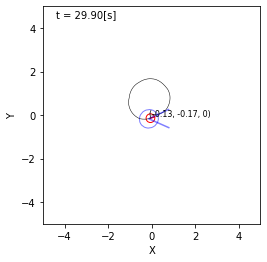

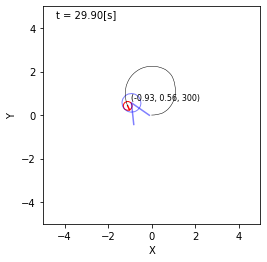

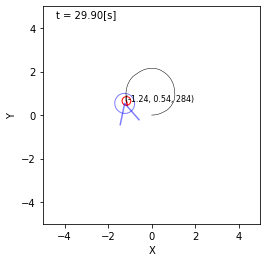

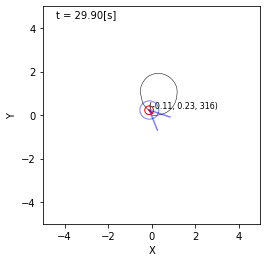

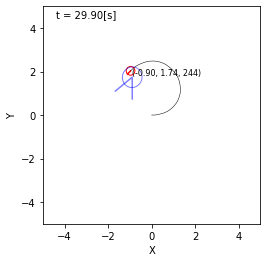

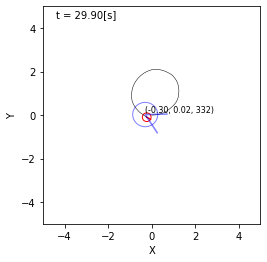

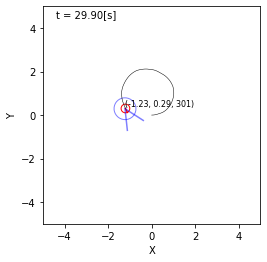

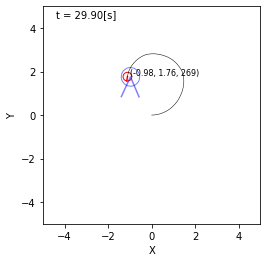

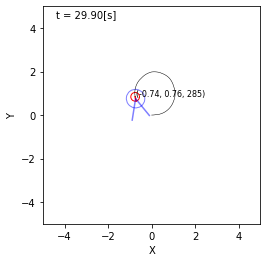

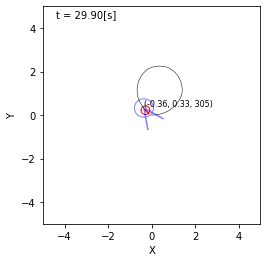

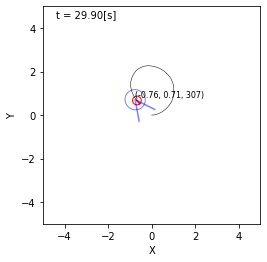

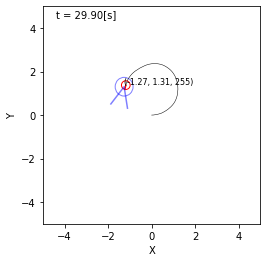

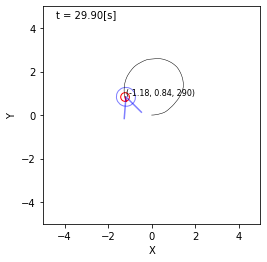

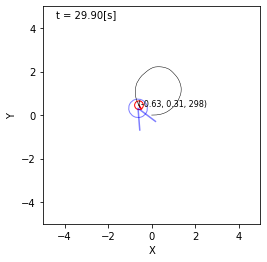

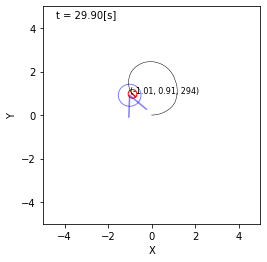

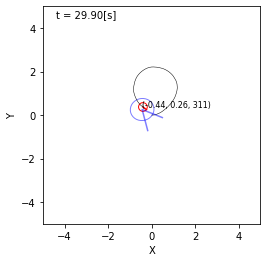

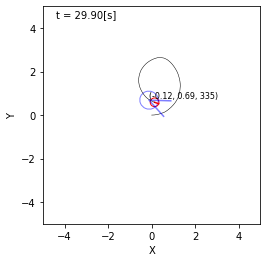

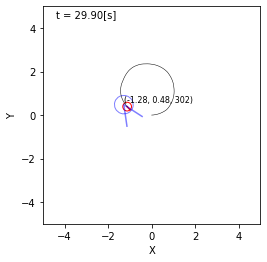

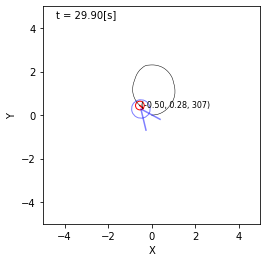

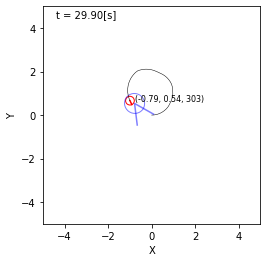

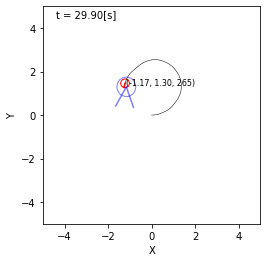

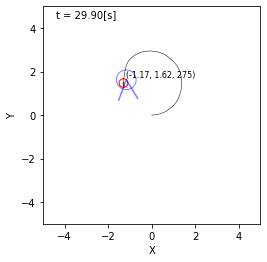

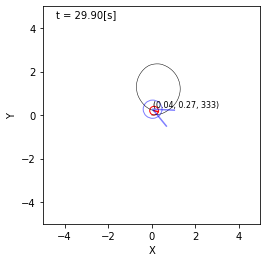

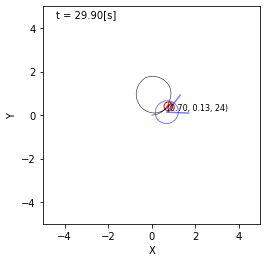

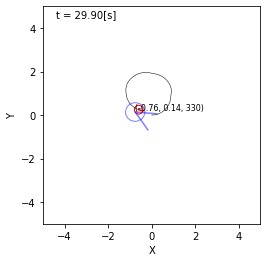

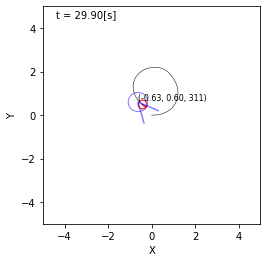

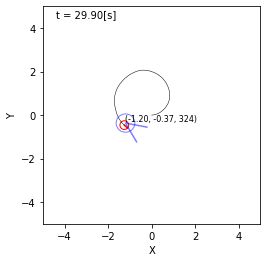

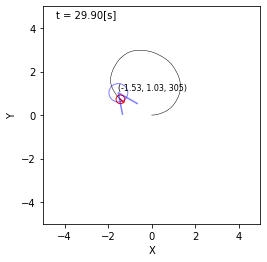

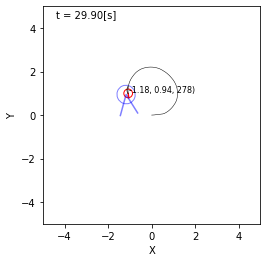

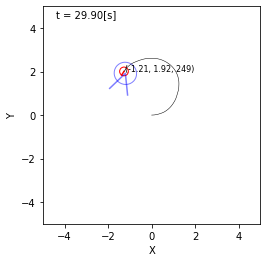

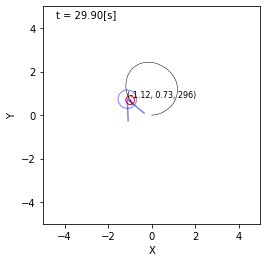

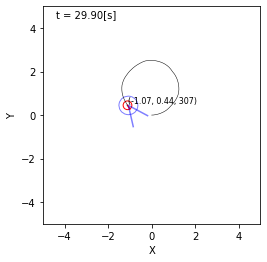

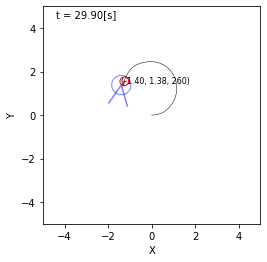

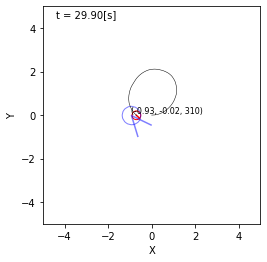

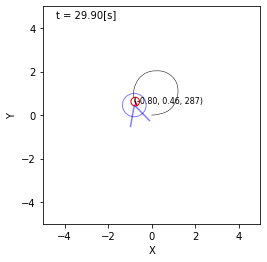

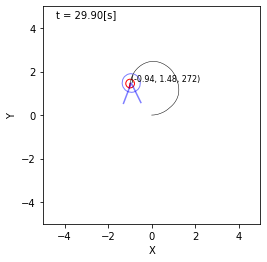

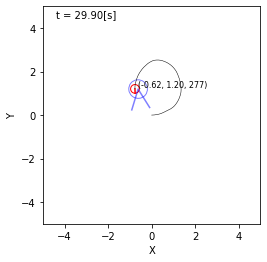

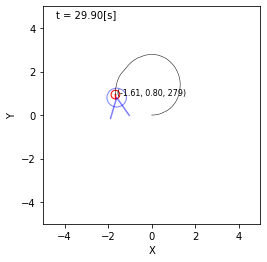

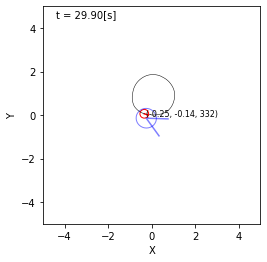

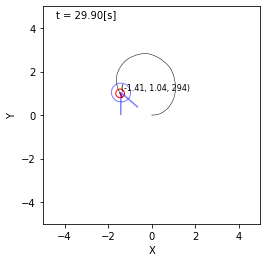

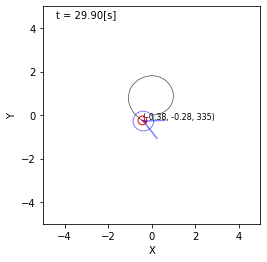

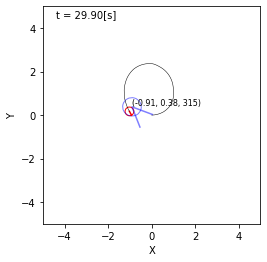

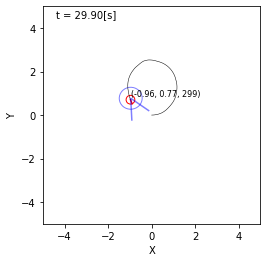

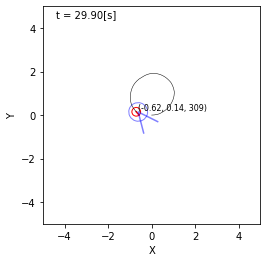

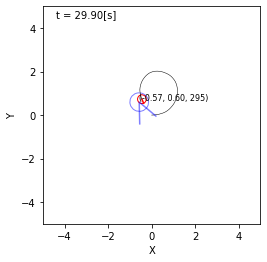

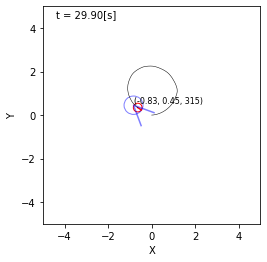

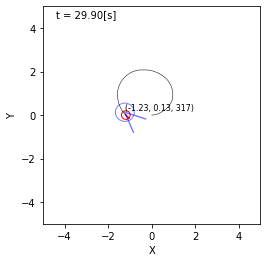

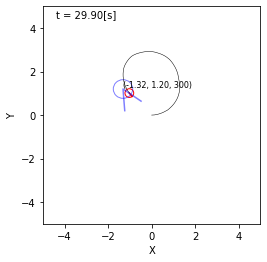

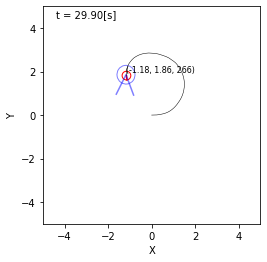

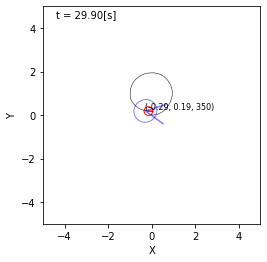

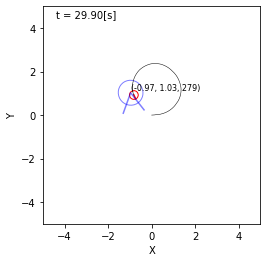

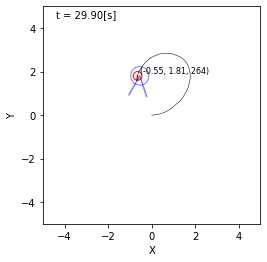

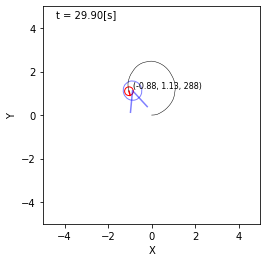

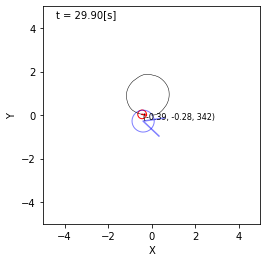

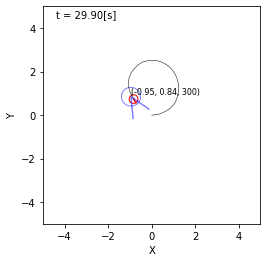

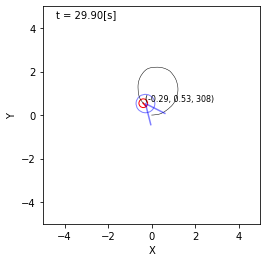

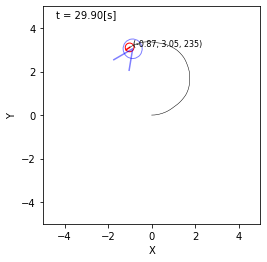

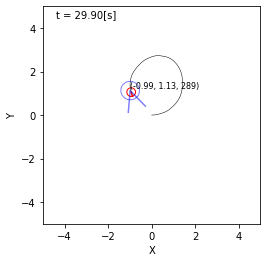

In [15]:
if __name__ == '__main__': 
    time_interval = 0.1
    trials = 100
    
    result_mcl100 = []
    result_mcl1000 = []
    result_ekf = []
    result_ukf = []
    
    print("trial times = {}".format(trials))

    # mcl (100)
    for i in range(trials):
        start = time.time()
        world = World(30, time_interval, debug=True)   
        ### ロボットを作る ###
        initial_pose = np.array([0, 0, 0]).T
        mcl100 = Mcl(initial_pose, 100)
        circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, mcl100)
        r = Robot(initial_pose, gnss=Gnss(time_interval, hz=1), agent=circling, color="red")
        world.append(r)
        world.draw()
        end = time.time()
        diff = end - start
        result_mcl100.append(diff)

    # mcl (1000)
    for i in range(trials):
        start = time.time()
        world = World(30, time_interval, debug=True)   
        ### ロボットを作る ###
        initial_pose = np.array([0, 0, 0]).T
        mcl1000 = Mcl(initial_pose, 1000)
        circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, mcl1000)
        r = Robot(initial_pose, gnss=Gnss(time_interval, hz=1), agent=circling, color="red")
        world.append(r)
        world.draw()
        end = time.time()
        diff = end - start
        result_mcl1000.append(diff)

    # ekf
    for i in range(trials):
        start = time.time()
        world = World(30, time_interval, debug=True)        
        initial_pose = np.array([0, 0, 0]).T
        kf = KalmanFilter(initial_pose)
        circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, kf)
        r = Robot(initial_pose, gnss=Gnss(time_interval, hz=1), agent=circling, color="red")
        world.append(r)
        world.draw()
        end = time.time()
        diff = end - start
        result_ekf.append(diff)
        
    # ukf
    for i in range(trials):
        start = time.time()
        world = World(30, time_interval, debug=True)        
        initial_pose = np.array([0, 0, 0]).T
        ukf = UnscentedKalmanFilter(initial_pose)
        circling = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, ukf)
        r = Robot(initial_pose, gnss=Gnss(time_interval, hz=1), agent=circling, color="red")
        world.append(r)
        world.draw()
        end = time.time()
        diff = end - start
        result_ukf.append(diff)

    
    # result
    print("MCL (100) Average = {:.3f}, Maximum = {:.3f}, Minimum = {:.3f}"
          .format(sum(result_mcl100)/len(result_mcl100), max(result_mcl100), min(result_mcl100)))

    print("MCL (1000) Average = {:.3f}, Maximum = {:.3f}, Minimum = {:.3f}"
          .format(sum(result_mcl1000)/len(result_mcl1000), max(result_mcl1000), min(result_mcl1000)))

    print("EKF Average = {:.3f}, Maximum = {:.3f}, Minimum = {:.3f}"
          .format(sum(result_ekf)/len(result_ekf), max(result_ekf), min(result_ekf)))

    print("UKF Average = {:.3f}, Maximum = {:.3f}, Minimum = {:.3f}"
          .format(sum(result_ukf)/len(result_ukf), max(result_ukf), min(result_ukf)))